## CamShift Tracking

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
cap = cv2.VideoCapture('Video/face_track.mp4')
ret, frame = cap.read()

# Setup initial tracking
face_casc = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
face_rects = face_casc.detectMultiScale(frame)

face_x, face_y, w, h = tuple(face_rects[0])
track_window = (face_x, face_y, w, h)


# Setting up ROI
roi = frame[face_y:face_y+h, face_x:face_x+w]
# HSV color mapping
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
# Histogram to target on each frame
roi_hist = cv2.calcHist([hsv_roi],[0],None,[180],[0,180])
# Normalize histogram
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Criteria
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

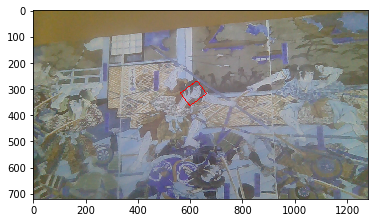

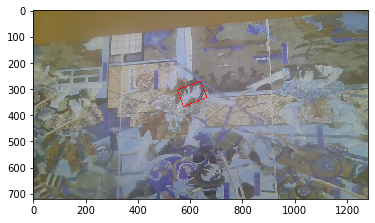

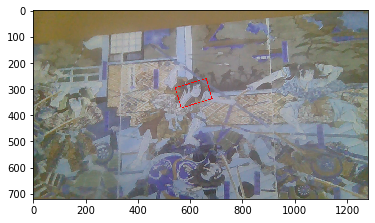

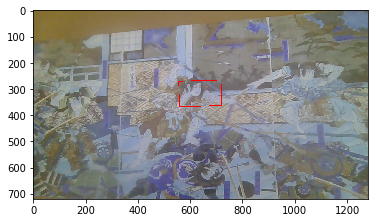

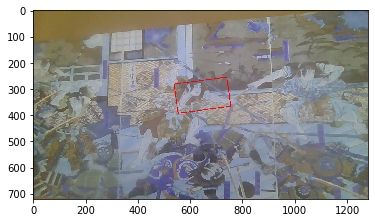

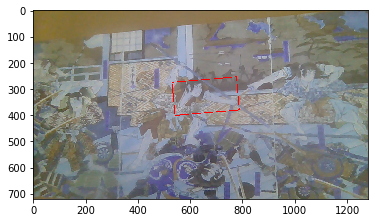

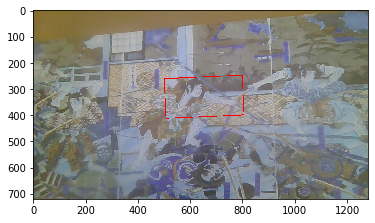

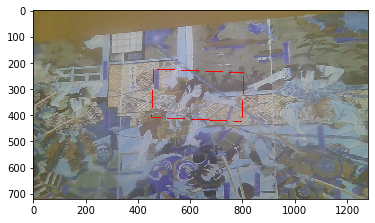

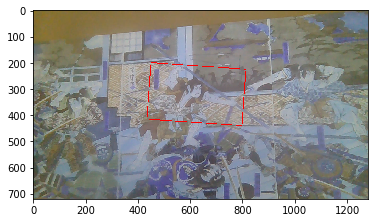

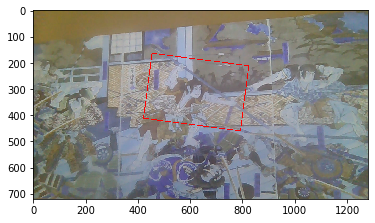

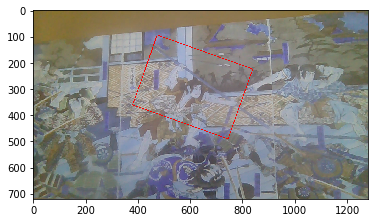

In [8]:
while True:
    ret ,frame = cap.read()
    
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply meanshift to get the new location
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        # Draw it on image
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv2.polylines(frame,[pts],True, 255,2)
        cv2.imshow('img2',img2)
        plt.imshow(img2)
        plt.show()

        k = cv2.waitKey(60) & 0xff
        if k == 27:
            break

    else:
        break

cv2.destroyAllWindows()
cap.release()